## A/B Testing

Image you are in a game APP Startup. you are the DS (Data Scientist) at the team. And one day, a PM come to you can said : "Hey I want to know 
if the recent product update really affect the APP download ? , here is the  data of download ***brfore/after prod update in the  control group (with ld version prod) and experiment group (with new version prod)***", can you please
help me to find out the answer and give some suggestion?

So now the DS got the data and start doing the evaluation  


In [80]:
# OP 
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt
from matplotlib import pyplot


# set plot style
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,10)

Populating the interactive namespace from numpy and matplotlib


In [58]:
# overview of  prod download data 
# let's create some toy data represent download in 2 groups 

# control group (with old version prod) 
# experiment group (with new version prod)

# df_before: download before prod update 
# control_dl : control group download 
# exp_dl : experiment group download 
df_before = pd.DataFrame({'exp_dl':[100,120,100,110,90,100,120,103,110,95,100] ,
                        'control_dl':[90,117,100,120,100,130,100,90,110,100,105] })

# df_after: download after prod update 
df_after = pd.DataFrame({'exp_dl':[100,120,150,200,210,200,200,250,300,200,200] ,
                        'control_dl':[100,120,130,90,110,120,100,90,100,110,100] })



## 0) Data Overview

In [54]:
# df_before: download before prod update 
df_before

,control_dl,exp_dl
0,90,100
1,117,120
2,100,100
3,120,110
4,100,90
5,130,100
6,80,120
7,90,125
8,110,110
9,100,95


In [59]:
# df_after: download after prod update 
df_after

,control_dl,exp_dl
0,100,100
1,120,120
2,130,150
3,90,200
4,110,210
5,120,200
6,100,200
7,90,250
8,100,300
9,110,200


----------  before prod update ----------


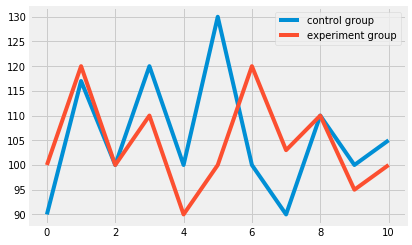

----------  after prod update ----------


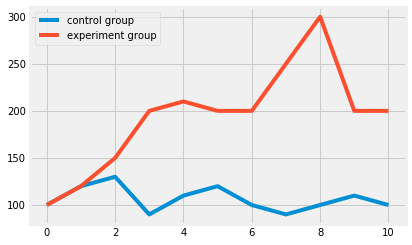

In [60]:
# curve plot 

print ('----------  before prod update ----------')
plt.plot(df_before)
plt.legend(['control group','experiment group'])
plt.show()


print ('----------  after prod update ----------')
plt.plot(df_after)
plt.legend(['control group','experiment group'])
plt.show()

----------  before prod update ----------


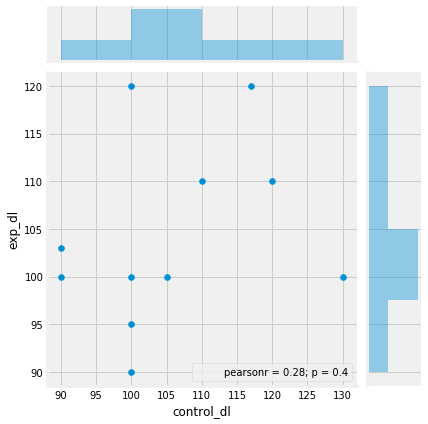

----------  after prod update ----------


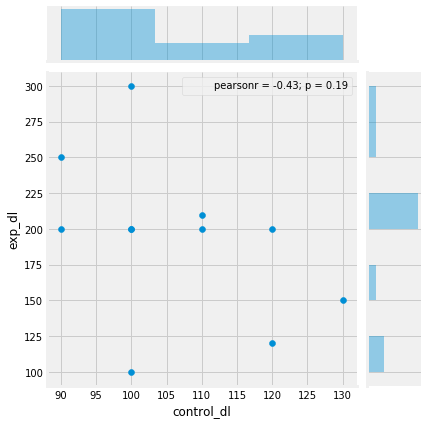

In [61]:
# scatter plot 

print ('----------  before prod update ----------')
sns.jointplot(x= "control_dl", y ="exp_dl", data=df_before)
plt.show()


print ('----------  after prod update ----------')
sns.jointplot(x= "control_dl", y ="exp_dl", data=df_after)
plt.show()

## 1) Statistics amounts

In [62]:
# calculate the mean 


print("Before prod update")
print(df_before.mean())
print()
print("After  prod update:")
print(df_after.mean())



Before prod update
control_dl    105.636364
exp_dl        104.363636
dtype: float64

After  prod update:
control_dl    106.363636
exp_dl        193.636364
dtype: float64


In [63]:
# calculate the standard deviation  


print("Before prod update")
print(df_before.std())
print()
print("After  prod update:")
print(df_after.std())


Before prod update
control_dl    12.508179
exp_dl         9.615329
dtype: float64

After  prod update:
control_dl    12.862914
exp_dl        55.726605
dtype: float64


In [64]:
# calculate the co-variance


print("Before prod update")
print(df_before.cov())
print()
print("After  prod update:")
print(df_after.cov())


Before prod update
            control_dl     exp_dl
control_dl  156.454545  33.945455
exp_dl       33.945455  92.454545

After  prod update:
            control_dl       exp_dl
control_dl  165.454545  -305.454545
exp_dl     -305.454545  3105.454545


In [65]:
# calculate the co-relation 


print("Before prod update")
print(df_before.corr())
print()
print("After  prod update:")
print(df_after.corr())


Before prod update
            control_dl    exp_dl
control_dl    1.000000  0.282243
exp_dl        0.282243  1.000000

After  prod update:
            control_dl    exp_dl
control_dl    1.000000 -0.426132
exp_dl       -0.426132  1.000000


## 2) T-test

----------  before prod update ----------


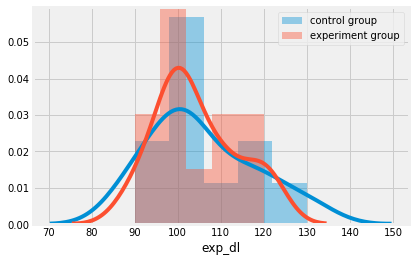

----------  after prod update ----------


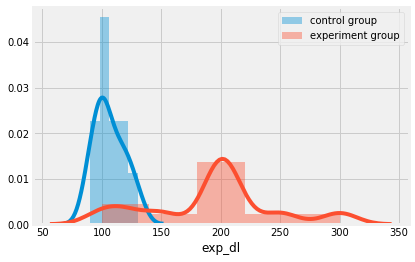

In [79]:
print ('----------  before prod update ----------')
sns.distplot(df_before['control_dl'],bins=5)
sns.distplot(df_before['exp_dl'],bins=5)
plt.legend(['control group','experiment group'])
plt.show()

print ('----------  after prod update ----------')
sns.distplot(df_after['control_dl'],bins=5)
sns.distplot(df_after['exp_dl'],bins=5)
plt.legend(['control group','experiment group'])
plt.show()

In [94]:
# Confidence interval  : 95% ( assume here)
# get Confidence interval on the  "mean of download "  on control  group download before prod update 


c_interval=stats.norm.interval(0.95, loc=df_before.control_dl.mean(), 
scale = df_before.control_dl.std()/np.sqrt(len(df_before)))
c_interval

(98.244637957212461, 113.02808931551482)

----------  control_dl download confidence interval (before prod update)  ----------


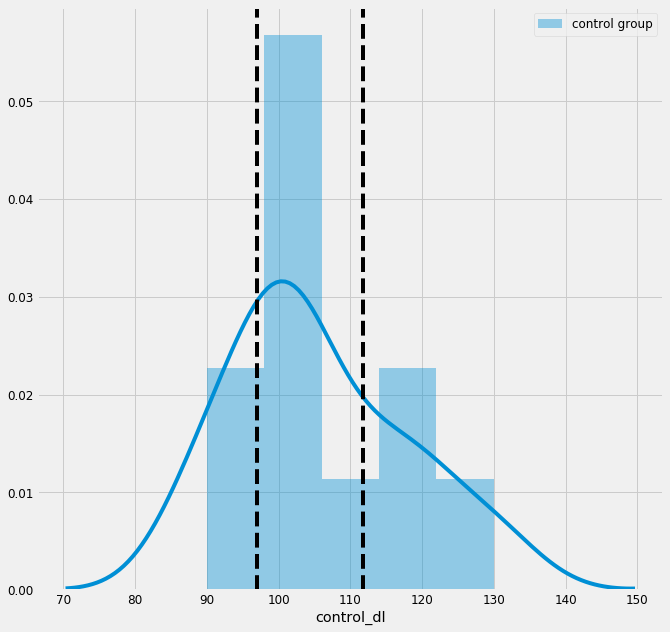

In [103]:
print ('----------  control_dl download confidence interval (before prod update)  ----------')
sns.distplot(df_before['control_dl'],bins=5)
#sns.distplot(df_before['exp_dl'],bins=5)
plt.legend(['control group'])
plt.axvline(x=c_interval[0],c='black',linestyle='--')
plt.axvline(x=c_interval[1],c='black',linestyle='--')
plt.show()


In [100]:
# Confidence interval  : 95% ( assume here)
# get the Confidence interval on the "mean of download " on experiment group download before prod update 


c_interval=stats.norm.interval(0.95, loc=df_before.exp_dl.mean(), 
scale = df_before.control_dl.std()/np.sqrt(len(df_before)))
c_interval


(96.971910684485181, 111.75536204278754)

----------  control_dl download confidence interval (before prod update)  ----------


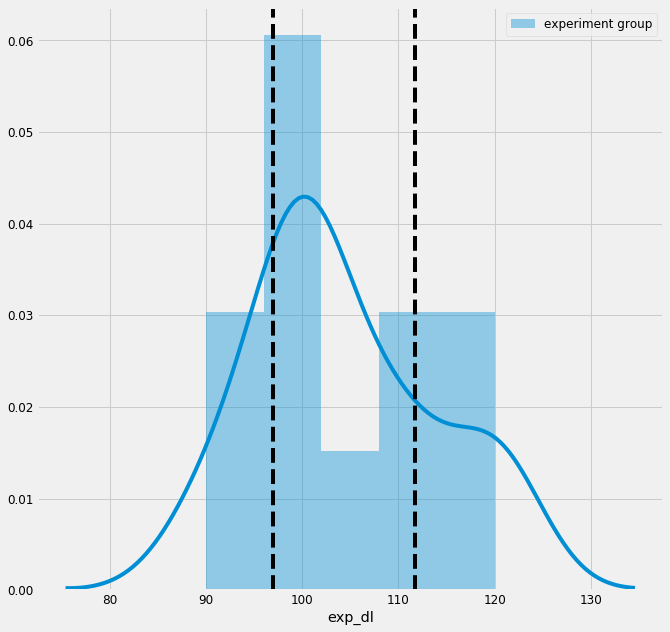

In [102]:
print ('----------  control_dl download confidence interval (before prod update)  ----------')
#sns.distplot(df_before['control_dl'],bins=5)
sns.distplot(df_before['exp_dl'],bins=5)
plt.legend(['experiment group'])
plt.axvline(x=c_interval[0],c='black',linestyle='--')
plt.axvline(x=c_interval[1],c='black',linestyle='--')
plt.show()
